# DSGE
## Exercise 5

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize
import autograd
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
from matplotlib import cm

from matplotlib import pyplot as plt

In [2]:
gamma = 2.5
beta = 0.98
alpha = 0.40
delta = 0.1
tau = 0.05
z = 0.0

def fun5(x):
    k = x[0]
    r = x[1]
    c = x[2]
    w = x[3]
    T = x[4]

    
    e1 = (1-tau)*(w + (r-delta)*k) +T - c
    e2 = beta*((r-delta)*(1-tau)+1) -1
    e3 = r - alpha*(k**(alpha-1))*(np.exp(z)**(1-alpha))
    e4 = w - (1-alpha)*(np.exp(z)**(-alpha))*np.exp(z)*k**(alpha)
    e5 = T -tau*(w+(r-delta)*k)
    
    return [e1, e2, e3, e4, e5] 


sols = root(fun5, np.ones(5)*.5)

k_ss, r_ss, c_ss, w_ss, T_ss = sols.x

# Optimal output values
y_ss = k_ss**alpha * (np.exp(z))**(1-alpha)

# Optimal investment values
invest_ss = y_ss - c_ss

print(sols.x, y_ss, invest_ss, c_ss)

[7.28749795 0.12148228 1.48450482 1.32795277 0.07422524] 2.213254613917651 0.7287497950689088 1.4845048188487422


## Exercise 6

In [3]:
xi = 1.5
beta = .98
alpha = .40
a = .5
delta= .10
z = 0.0
tau = .05
gamma = 2.5

parameters = gamma, xi, beta, alpha, a, delta, z, tau



def fun6(x, *parameters):
    k, r, c, w, T, l = x

    
    e1 = (1-tau)*((w*l)+(r-delta)*k)+T - c
    e2 = beta*(c**(-gamma)*((r-delta)*(1-tau)+1)) - c**(-gamma)
    e3 = c**(-gamma)*w*(1-tau) - a*(1-l)**(-xi)
    e4 = r - alpha*(k**(alpha-1))*(l*np.exp(z))**(1-alpha)
    e5 = w - k**(alpha)*(1-alpha)*(l*np.exp(z))**(-alpha)*np.exp(z)
    e6 = T -tau*(l*w+(r-delta)*k)
    
    return [e1, e2, e3, e4, e5, e6]


sols = root(fun6, np.ones(6)*.5)

k_ss, r_ss, c_ss, w_ss, T_ss, l_ss = sols.x

# Optimal output value
y_ss = k_ss**alpha * (l_ss*np.exp(z))**(1-alpha)

# Optimal investment value
invest_ss = y_ss - c_ss

print(y_ss, invest_ss, c_ss)
print(sols.x)

1.2832261087747827 0.4225229026042062 0.8607032061705765
[4.22522903 0.12148228 0.86070321 1.32795277 0.04303516 0.57979145]


## Exercise 7

In [4]:
def system(x, xi):
    k, r, c, w, T, l = x
    
    beta = .98
    alpha = .40
    a = .5
    delta = .10
    z = 0.0
    tau = .05
    gamma = 2.5
    xi = 1.5
    
    e1 = (1-tau)*((w*l)+(r-delta)*k)+T - c
    e2 = beta*(c**(-gamma)*((r-delta)*(1-tau)+1)) - c**(-gamma)
    e3 = c**(-gamma)*w*(1-tau) - a*(1-l)**(-xi)
    e4 = r - al*(k**(al-1))*(l*np.exp(z))**(1-alpha)
    e5 = w - k**(alpha)*(1-alpha)*(l*np.exp(z))**(-al)*np.exp(z)
    e6 = T -tau*(l*w+(r-delta)*k)
    
    return [e1, e2, e3, e4, e5, e6] 

    
def solver_fun(xi):
    guess = np.ones(6)*.5
    sol = root(system, guess, method = 'hybr', args=(xi))
    
    k_ss, r_ss, c_ss, w_ss, T_ss, l_ss = sol.x
    y_ss = k_ss**alpha * (l_ss*np.exp(z))**(1-alpha)
# Optimal output value
    return y_ss


dsolver = elementwise_grad(solver_fun)

print(y_ss, invest_ss, c_ss)
print(sols.x)

1.2832261087747827 0.4225229026042062 0.8607032061705765
[4.22522903 0.12148228 0.86070321 1.32795277 0.04303516 0.57979145]


# Linear

## Exercise 1

In [5]:
beta = 0.98
alpha = 0.40
z=0

In [6]:
A=alpha*beta
Kbar=A**(1/(1-alpha))

N=0.9
F=(A*Kbar**(alpha-1))/(Kbar**alpha-Kbar)
G=-A*Kbar**(alpha-1)*(alpha+Kbar**(alpha-1))/(Kbar**alpha-Kbar)
H=A*alpha*Kbar**(2*(alpha-1))/(Kbar**alpha-Kbar)
L=-A*Kbar**(2*alpha-1)/(Kbar**alpha-Kbar)
M=A*alpha*Kbar**(2*(alpha-1))/(Kbar**alpha-Kbar)

P_1=(-G+np.sqrt(G**2-4*F*H))/(2*F)
P_2=(-G-np.sqrt(G**2-4*F*H))/(2*F)
Q_1=-(L*N+M)/(F*N+F*P_1+G)
Q_2=-(L*N+M)/(F*N+F*P_2+G)

print({"F": F, "G": G, "H": H, "M": M, "N": N, "P_1": P_1, "P_2": P_2, "Q_1": Q_1, "Q_2": Q_2, "L": L})

{'F': 3.070711692755581, 'G': -9.061732872907287, 'H': 3.1333792783220216, 'M': 3.1333792783220216, 'N': 0.9, 'P_1': 2.5510204081632657, 'P_2': 0.4, 'Q_1': -1.0766990104133285, 'Q_2': 0.3260707757123181, 'L': -1.644736842105263}


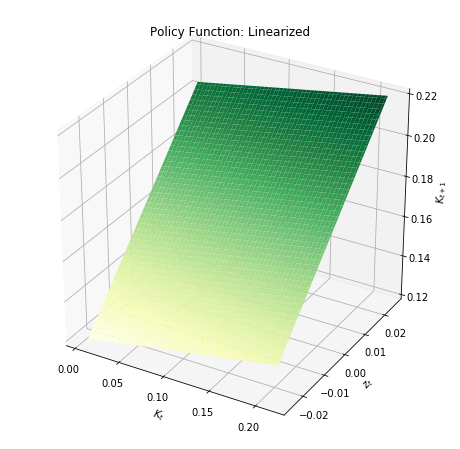

In [7]:
Kgrid=np.linspace(0.025*Kbar,1.025*Kbar, 100)
zgrid=np.linspace(-0.025,0.025, 100)

K,Z=np.meshgrid(Kgrid,zgrid)

policy_1= np.zeros((100,100))
for ii in range(100):
    for jj in range(100):
        policy_1[ii,jj]=Kbar + P_2*(Kgrid[ii]-Kbar)+Q_2*zgrid[jj]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, Z, policy_1,cmap='YlGn')
ax.set_title('Policy Function: Linearized')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.show()

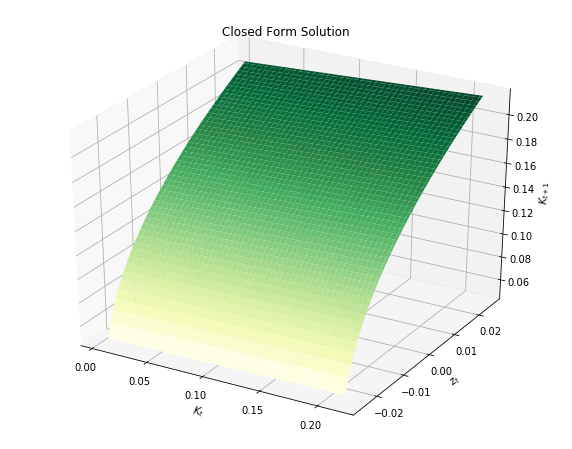

In [8]:
policy_2= np.zeros((100,100))
for ii in range(100):
    for jj in range(100):
        policy_2[ii,jj] = A*np.exp(zgrid[jj])*Kgrid[ii]**alpha

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, Z, policy_2, cmap='YlGn')
ax.set_title('Closed Form Solution')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.show()

In [9]:
# At the steady state both functions are very similar, however, the further away from the steady state

## Exercise 2

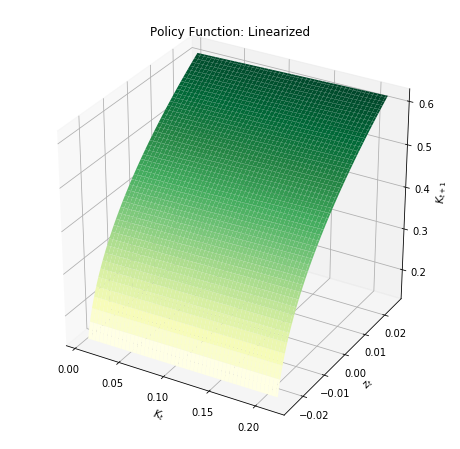

In [10]:
Kbar= A**(1/(1-alpha))

K,Z=np.meshgrid(Kgrid,zgrid)

exp_policy_1= np.zeros((100,100))
for ii in range(100):
    for jj in range(100):
        exp_policy_1[ii,jj] =np.exp(Kbar + P_2*(np.log(Kgrid[ii])-Kbar)+Q_2*zgrid[jj])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, Z, exp_policy_1,cmap='YlGn')
ax.set_title('Policy Function: Linearized')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
plt.show();

## Exercise 3: see pdf

## Exercise 4
Using the example from class for help

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [12]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(ell*np.exp(z))**(1-alpha)
    w = (1-alpha)*k**alpha*(np.exp(z))**(1-alpha)*ell**(-alpha)
    r = alpha*k**(alpha-1)*(ell*np.exp(z))**(1-alpha)
    T = tau*(w*ell+(r-delta)*k)
    c = (1-tau)*(w*ell+(r-delta)*k)+k+T-kp
    i = GDP-c
    u = (c**(1-gamma)-1)/(1-gamma) + a*((1-ell)**(1-xi)-1)/(1-xi)

    return GDP, w, r, T, c, i, u

def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    E1 = (c**(-gamma)*w*(1-tau))/(a*(1-ell)**(-xi))-1
    E2 = (c**(-gamma))/(beta*cp**(-gamma)*(1+(1-tau)*(rp-delta)))-1
    
    return np.array([E1, E2])
    

In [13]:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.10
z_bar = 0
rho = 0.9
tau = 0.05
sigma=np.sqrt(0.004)

# make parameter list to pass to functions
params = [alpha, beta, gamma, delta, a, xi, rho, sigma, tau]

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [14]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = \
    Modeldefs(kbar, kbar, ellbar, 0., params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('Tbar:   ', Tbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

check SS:  [1.11948006e-10 1.57429625e-13]
kbar:    4.225229026690466
ellbar:  0.5797914531528428
Ybar:    1.2832261088024324
wbar:    1.3279527683525396
rbar:    0.12148227712120557
Tbar:    0.04303516030666928
cbar:    0.860703206133385
ibar:    0.42252290266904735
ubar:    -0.7108726381220564


## Exercise 5

In [15]:
# same exercise as in PS1 question 7

## Exercise 6

using the example from class

In [16]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)
print ('F: ', FF)
print ('G: ', GG)
print ('H: ', HH)
print ('L: ', LL)
print ('M: ', MM)
print ('N: ', NN)
print ('P: ', PP)
print ('Q: ', QQ)

F:  [[-2.9046017]]
G:  [[5.88766154]]
H:  [[-2.96699916]]
L:  [[2.16849645]]
M:  [[-2.23635645]]
N:  0.9
P:  [[0.91529369]]
Q:  [[0.54504226]]


## Exercise 7

In [17]:
# generate a history of Z's
T = 250  # number of observations to generate
nit = 10000

khist = np.zeros((nit,T+1))
ellhist = np.zeros((nit,T+1))
zhist = np.zeros((nit,T+1))
Yhist = np.zeros((nit, T))
rhist = np.zeros((nit, T))
whist = np.zeros((nit, T))
Thist = np.zeros((nit,T))
chist = np.zeros((nit, T))
ihist = np.zeros((nit, T))
uhist = np.zeros((nit, T))
k0 = np.array([[kbar]])

In [18]:
for it in range (nit):
    # initialize Z
    epshist = np.random.randn(1,T+1)*np.sqrt(.0004)
    for t in range (1,T+1):
        zhist[it,t] = rho*zhist[it,t-1] + epshist[:,t]
    # generate a history of k's
    Zhist = np.reshape(zhist[it,:], (T+1,1))
    kiter, elliter = LinApp_SSL(k0, Zhist, XYbar, logX, PP, QQ, RR, SS)
    khist[it,:]=kiter.transpose()
    ellhist[it,:]=elliter.transpose()
    
    for t in range(T):
        Yhist[it,t], whist[it,t], rhist[it,t], Thist[it,t], chist[it,t], ihist[it,t], uhist[it,t] = \
        Modeldefs(khist[it,t+1], khist[it,t], ellhist[it,t], zhist[it,t], params)

khist = khist[:,0:T]
zhist = zhist[:,0:T]
ellhist = ellhist[:,0:T]


In [19]:
ymean= np.mean(Yhist, axis=0)
cmean= np.mean(chist, axis=0)
ellmean= np.mean(ellhist, axis=0)
imean= np.mean(ihist, axis=0)

In [20]:
ystd= np.std(Yhist, axis=0)
ylow= ymean - 1.96*ystd/np.sqrt(nit)
yhigh= ymean + 1.96*ystd/np.sqrt(nit)

cstd= np.std(chist, axis=0)
clow= cmean - 1.96*cstd/np.sqrt(nit)
chigh= cmean + 1.96*cstd/np.sqrt(nit)

ellstd= np.std(ellhist, axis=0)
elllow= ellmean - 1.96*ellstd/np.sqrt(nit)
ellhigh= ellmean + 1.96*ellstd/np.sqrt(nit)

istd= np.std(ihist, axis=0)
ilow= imean - 1.96*istd/np.sqrt(nit)
ihigh= imean + 1.96*istd/np.sqrt(nit)


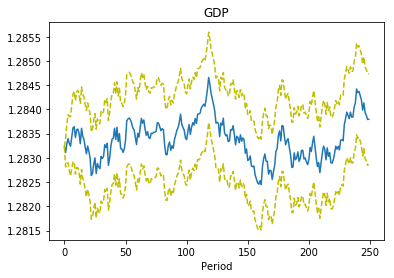

In [21]:
plt.plot(range(T), ymean, '-')
plt.plot(range(T), ylow, 'y--')
plt.plot(range(T), yhigh, 'y--')
plt.title("GDP")
plt.xlabel("Period")
plt.show()

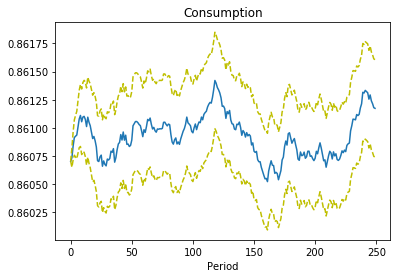

In [22]:
plt.plot(range(T), cmean, '-')
plt.plot(range(T), clow, 'y--')
plt.plot(range(T), chigh, 'y--')
plt.title("Consumption")
plt.xlabel("Period")
plt.show()

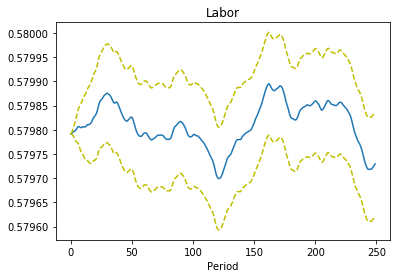

In [23]:
plt.plot(range(T), ellmean, '-')
plt.plot(range(T), elllow, 'y--')
plt.plot(range(T), ellhigh, 'y--')
plt.title("Labor")
plt.xlabel("Period")
plt.show()

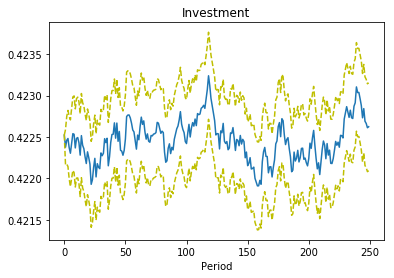

In [24]:
plt.plot(range(T), imean, '-')
plt.plot(range(T), ilow, 'y--')
plt.plot(range(T), ihigh, 'y--')
plt.title("Investment")
plt.xlabel("Period")
plt.show()

## Exercise 8

## Exercise 9

Impulse response function

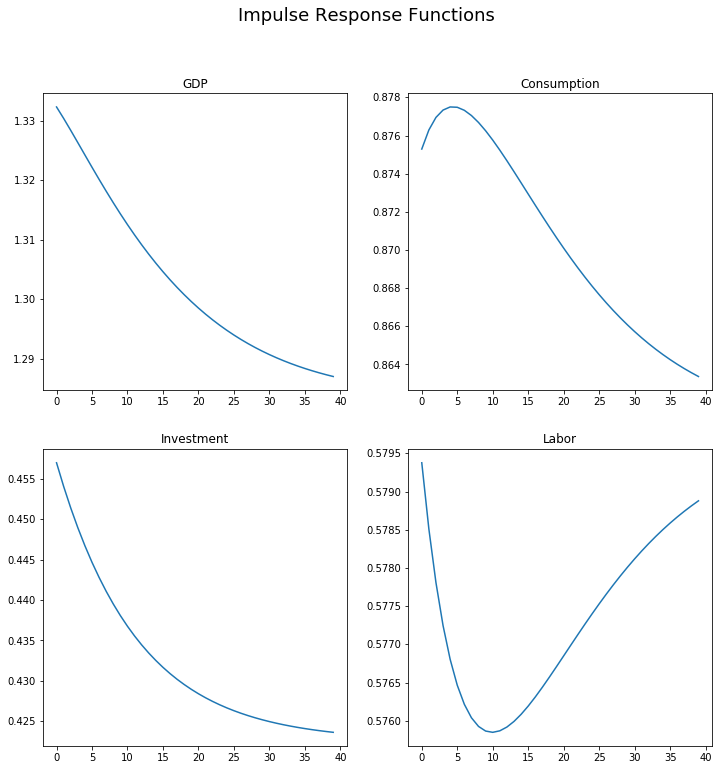

In [25]:
# set number of observations
nobs = 40

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
epshist[0] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = rho*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
Thist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)

fig = plt.figure(figsize=(12,12))
fig.suptitle('Impulse Response Functions', fontsize=18)

plt.subplot(2,2,1)
plt.plot(time, Yhist, label='Y')
plt.title('GDP')

plt.subplot(2,2,2)
plt.plot(time, chist, label='c')
plt.title('Consumption')

plt.subplot(2,2,3)
plt.plot(time, ihist, label='i')
plt.title('Investment')

plt.subplot(2,2,4)
plt.plot(time, ellhist, label='ell')
plt.title('Labor')

plt.show()

# Perturbation

## Exercise 1

using the code from the class

In [26]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
k0 = 5.

# set value for epsilon
eps = .01

alpha = .33
k=5
z=1
b=2
t=.1
h=24

def excess(w,k):
    nd=((1-alpha)*z/w)**(1/alpha)*k
    prof= z*k**alpha*nd**(1-alpha)-w*nd
    return nd-(h-b/(w*(1+b))*(w*h+prof-t))

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

w0:  [0.62736178]
check:  [0.]


In [27]:
x0=k0
y0=w0

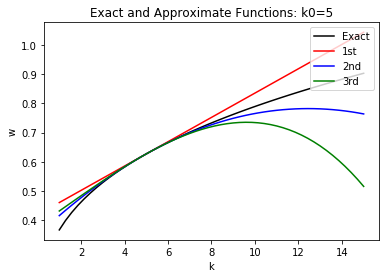

In [28]:
def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, w0, k0, eps)
    

# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 1
max = 15
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions: k0=5')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

w0:  [0.78930333]
check:  [1.42108547e-14]


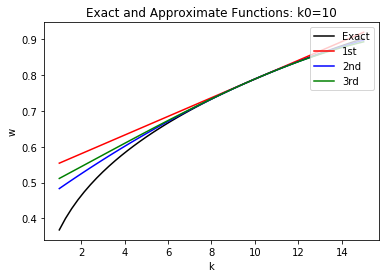

In [29]:
# choose approximation point
k0 = 10.

# set value for epsilon
eps = .01

alpha = .33
k=5
z=1
b=2
t=.1
h=24

def excess(w,k):
    nd=((1-alpha)*z/w)**(1/alpha)*k
    prof= z*k**alpha*nd**(1-alpha)-w*nd
    return nd-(h-b/(w*(1+b))*(w*h+prof-t))

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

x0=k0
y0=w0

def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, w0, k0, eps)
    

# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 1
max = 15
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions: k0=10')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

## Question 3

for simplicity I stick with k and w --> but technically w=y and k=x

In [30]:
# choose approximation point
k0 = 100.

# set value for epsilon
eps = .1

def excess(w,k):
    return (k**.35+.9*k-w)**(-2.5)-0.95*(w**.35+.9*w)**(-2.5)

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

w0:  [47.46578754]
check:  [-2.24971951e-18]


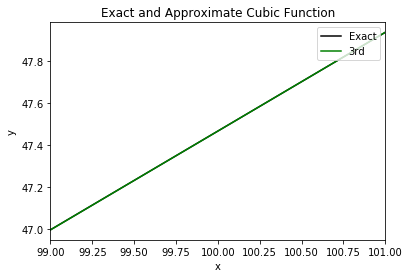

In [31]:
x0=k0
y0=w0
#use x and y to ease coordination on the grid
def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, w0, k0, eps)
    

# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 99
max = 101
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '3rd'], loc=1)
plt.title('Exact and Approximate Cubic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(99,101)
plt.show()

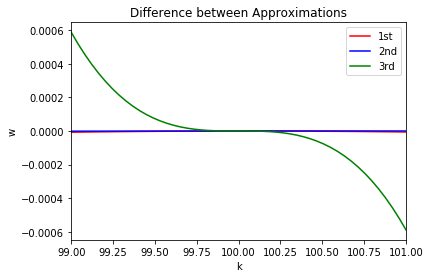

In [32]:
diff_lin = wgrid-w1grid
diff_quad = wgrid-w2grid
diff_cub= wgrid-w3grid

plt.plot(kgrid, diff_lin, 'r-',
         kgrid, diff_quad, 'b-',
         kgrid, diff_cub, 'g-')
plt.legend(['1st', '2nd', '3rd'], loc=1)
plt.title('Difference between Approximations')
plt.xlabel('k')
plt.ylabel('w')
plt.xlim(99,101)
plt.show()